 	Macrophage/ monocyte lineage cells isolated from E14.5 whole body were subjected to the sc RNA-seq. All samples included tdTomato expressing cells derived from E8.5 or E9.5 erythromyeloid progenitors in the yolk-sac.

In [9]:
import pandas as pd
import gzip
import scipy
import anndata as ad
import scanpy as sc
import decoupler as dc
import numpy as np
import os

In [7]:
wkdir = '/home/jing/Downloads/lypi_DATA/GSE125088/'

In [13]:
barcodes = pd.read_csv(os.path.join(wkdir,'GSE125088_Cx3cr1_Csf1r_new.barcodes.tsv.gz'), sep="\t", compression="gzip", header=None)
features = pd.read_csv(os.path.join(wkdir,'GSE125088_Cx3cr1_Csf1r_new.features.tsv.gz'), sep="\t", compression="gzip", header=None)
with gzip.open(os.path.join(wkdir,'GSE125088_Cx3cr1_Csf1r_new.matrix.mtx.gz'), "rt") as f:
    sparse_matrix = scipy.io.mmread(f)
matrix = sparse_matrix.todense()

In [14]:
adata = ad.AnnData(X=matrix.T)
adata.obs_names = barcodes.iloc[:, 0].values
adata.var_names = features.iloc[:, 1].values
adata.var_names_make_unique()
if isinstance(adata.X, np.matrix):
    adata.X = np.array(adata.X)

In [15]:
# Basic pre-processing steps   
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/tmp/ipykernel_605687/1318742813.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1)


In [17]:
adata

AnnData object with n_obs × n_vars = 39048 × 31054
    obs: 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [77]:
sc.tl.leiden(adata, resolution=0.5,random_state=0)

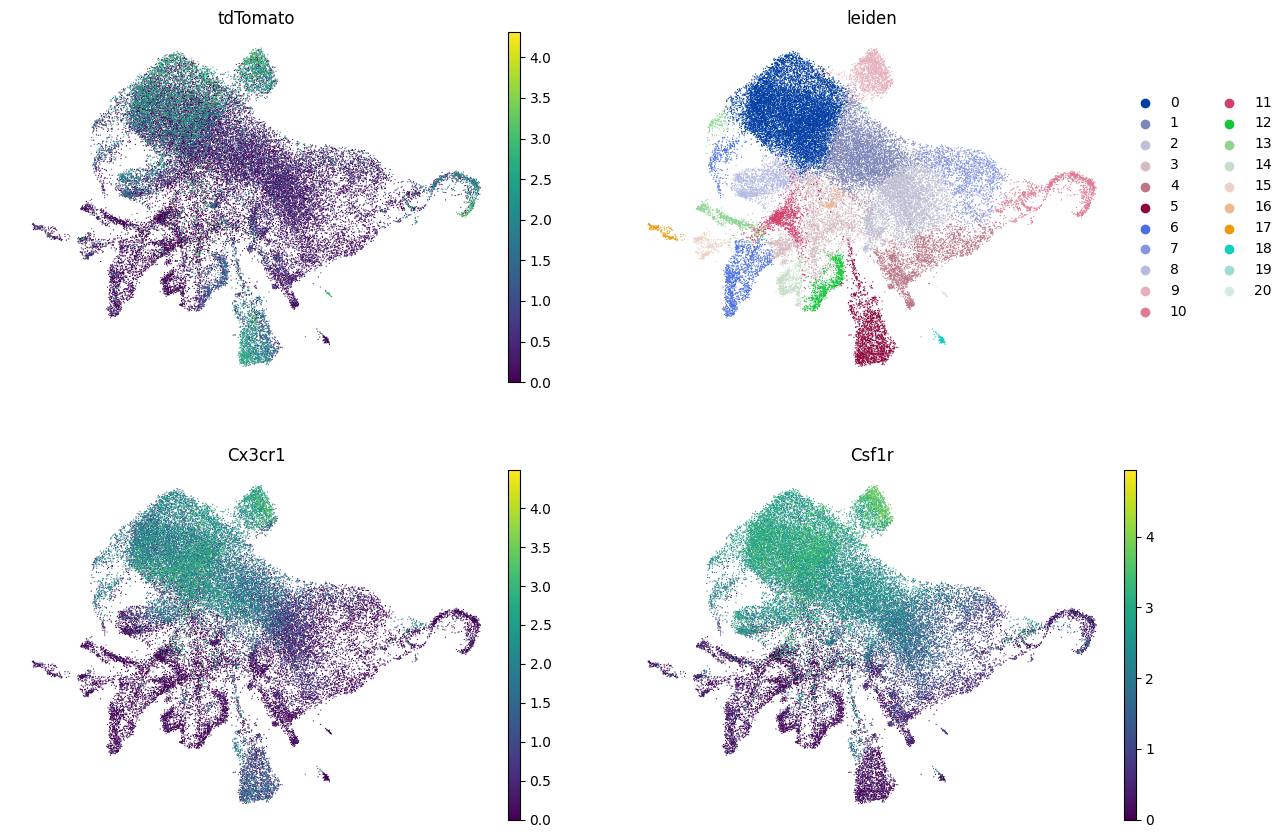

In [95]:
sc.pl.umap(adata,color=['tdTomato','leiden','Cx3cr1','Csf1r'],ncols=2,frameon=False)

In [87]:
adata.obs['cell_type'] = 't'

In [88]:
adata.obs.loc[adata.obs['leiden'] == '10', 'cell_type'] = 'Neutrophils'
adata.obs.loc[adata.obs['leiden'] == '14', 'cell_type']  ='Erythrocytes'

In [63]:
#0,5,8,1
adata.obs.loc[adata.obs['leiden'] == '1', 'cell_type']  ='Macrophages'

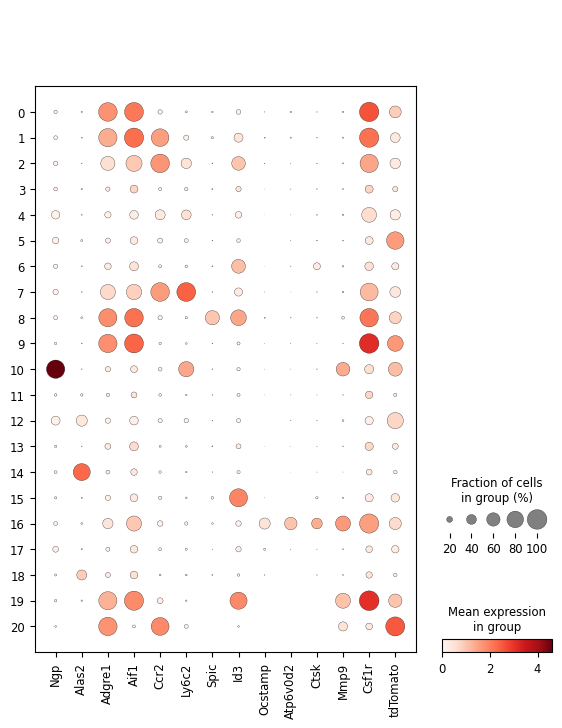

In [86]:
sc.pl.dotplot(adata, var_names=["Ngp","Alas2", "Adgre1", "Aif1", "Ccr2", "Ly6c2", "Spic","Id3" ,'Ocstamp','Atp6v0d2','Ctsk',
                                'Mmp9','Csf1r','tdTomato'], groupby='leiden' )

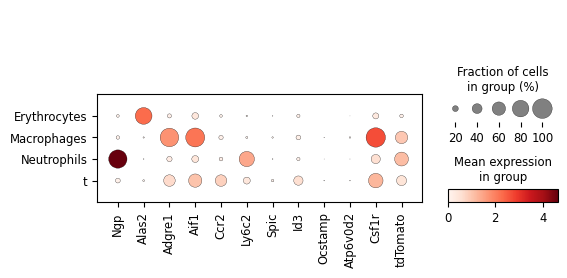

In [75]:
sc.pl.dotplot(adata, var_names=["Ngp","Alas2", "Adgre1", "Aif1", "Ccr2", "Ly6c2", "Spic","Id3" ,'Ocstamp','Atp6v0d2','Csf1r','tdTomato'], groupby='cell_type' )

In [ ]:
#cluster 12 Neutrophils
#cluster 18 Erythrocytes
#

# NGP neutrophiles
# Alas 2 erythorsites
# Cluster 22 osteoblasts
# adgre1, aif1 machrophages
# ccr2 ly6c2 monocytes
# spic id3, kuppfer cells and splenic red pulp
# Erythroid precursor cells

In [ ]:
new_cluster_names = [
    "CD4 T",
    "B",
    "FCGR3A+ Monocytes",
    "NK",
    "CD8 T",
    "CD14+ Monocytes",
    "Dendritic",
    "Megakaryocytes",
]
adata.rename_categories("leiden", new_cluster_names)

In [ ]:


"MRC1", "LYVE1", "TREM2", "HEXB", "CCR2", "IFITM3", "TDTOMATO", 
,"LY6G", "CX3CR1",  "PECAM1", "CDH5", 
                               "CTSK", "MMP9", "OCSTAMP", "NFATC1", "CSF1R", "TDTOMATO", "GATA2", "HES1",
                        "MRC1", "GAS6", "CXCL2", "RPGRIP1", "MPO", "FLT3",  "TUBB3", "COL1A1",
# NGP neutrophiles
# Alas 2 erythorsites
# Cluster 22 osteoblasts
# adgre1, aif1 machrophages
# ccr2 ly6c2 monocytes
# spic id3, kuppfer cells and splenic red pulp
# Erythroid precursor cells